# Story - 5: What Is The Effect Of The Earth's Temperature on Cyclonic Storms?
---

CUNY DATA 608

Spring 2024

Daria Dubovskaia

# Overview

Have you ever wondered why hurricanes seem to be getting stronger? In our project, we take on the role of climate detectives, using data science tools to investigate the relationship between rising global temperatures and the frequency and severity of storms. Consider it a data quest in which we track climate changes and discover the stories they reveal about our world.

We use graphs and charts, similar to those found in video games, to track progress and show how temperatures and storms have changed over the last 25 years. Just like in a game, we look for patterns—do more storms occur when it's hotter? Is there a difference in the story when we look at the entire world rather than just the United States?

But it's not just about the numbers. We tell a story that goes beyond the data, connecting the dots to demonstrate how a warmer world can result in more severe storms. It's like adding scenario to a movie scene. By the end, you'll have a clear picture of how scientists use data to understand our changing planet, similar to how you use clues in a game to progress.

# 1. Data Preparation

## 1.1 Load data

We accessed a variety of climate and meteorological datasets from 1999 to 2023.

Initially, NOAA's Climate at a Glance portal provided global temperature data as well as temperature records specific to the United States. To supplement this, we obtained data on US tornado occurrences from NOAA's Tornadoes database, as well as cyclone energy data from the Tropical Meteorology Project.

We acquired these datasets and uploaded them to a dedicated GitHub repository, which now serves as our centralized and easily accessible data store. It allows for open sharing of our data sources.

**Data**:

**Global Temperature**: Shows how the Earth's temperature changes.

**US Temperature**: Monitors temperature changes in the United States.

**Hurricane**: Keep track of hurricane occurrences and details.

**Tornado**: Describes the frequency and details of tornadoes in the United States.

In [ ]:
# @title
# libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# @title
# Load the datasets from github
df_1 = pd.read_csv("https://raw.githubusercontent.com/ex-pr/DATA_608/main/Story_5/global_temperature.csv",
    skiprows=4,  # Skip the initial 4 rows that are not part of the data.
    sep=',',  # Specify the comma as a separator.
    skipinitialspace=True  # Skip any spaces following the separator.
)
df_2 = pd.read_csv(
    "https://raw.githubusercontent.com/ex-pr/DATA_608/main/Story_5/us_temperature.csv",
    skiprows=4,
    sep=',',
    skipinitialspace=True
)
df_3 = pd.read_csv("https://raw.githubusercontent.com/ex-pr/DATA_608/main/Story_5/us_tornadoes.csv")

In [ ]:
# @title
# Load storm data table
# Disable SSL warnings from `urllib3`
requests.packages.urllib3.disable_warnings()

# The URL
url = "https://tropical.atmos.colostate.edu/Realtime/index.php?arch&loc=global"

# Send a GET request to the URL
response = requests.get(url, verify=False)

# Parse the HTML content of the page with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the first table
table = soup.find_all('table')[0]

# Convert the table to a DataFrame
df_4 = pd.read_html(str(table))[0]

In [ ]:
# @title
# Combining the datasets
global_temperature = df_1.copy()
us_temperature = df_2.copy()
us_tornadoes = df_3.copy()
hurricanes = df_4.copy()

## 1.2 Summary Statistics

**Global Temperature Anomaly**: The dataset from 1999 to 2023 consists of 25 records with no missing values. Each entry documents the year and the corresponding temperature anomaly in degrees Celsius.

A **temperature anomaly** is a deviation from the baseline temperature. The baseline temperature is usually calculated by averaging 30 years or more of temperature data. A positive anomaly indicates that the observed temperature was higher than the baseline, whereas a negative anomaly indicates that it was lower than the baseline.

**US Temperature Anomaly**: The US temperature dataset covers the same timeframe and includes 25 entries on yearly temperature anomalies in the North American region.

**Hurricane Activity**: This dataset provides detailed metrics on storm activity from 1980 to 2023. The variables capture not only the number of named storms and hurricanes, but also their duration and intensity, which includes category 3+ hurricanes and their associated cyclone energy.

**US Tornado**: With 74 observations, from 1950 to 2023, the dataset provides detailed information on tornado occurrences in the US, including fatalities.

In [ ]:
# @title
global_temperature.head(), global_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     25 non-null     int64  
 1   Anomaly  25 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(   Year  Anomaly
 0  1999     0.41
 1  2000     0.41
 2  2001     0.55
 3  2002     0.62
 4  2003     0.63,
 None)

In [ ]:
# @title
us_temperature.head(), us_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     25 non-null     int64  
 1   Anomaly  25 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(   Year  Anomaly
 0  1999     1.11
 1  2000     0.79
 2  2001     1.22
 3  2002     0.75
 4  2003     0.99,
 None)

In [ ]:
# @title
hurricanes.head(), hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        44 non-null     int64  
 1   Named Storms                44 non-null     int64  
 2   Named Storm Days            44 non-null     float64
 3   Hurricanes                  44 non-null     int64  
 4   Hurricanes Days             44 non-null     float64
 5   Cat. 3+ Hurricanes          44 non-null     int64  
 6   Cat. 3+ Hurricanes Days     44 non-null     float64
 7   Accumulated Cyclone Energy  44 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 2.9 KB


(   Year  Named Storms  Named Storm Days  Hurricanes  Hurricanes Days  \
 0  1980            73            367.25          43           143.75   
 1  1981            82            363.75          45           125.75   
 2  1982            81            428.75          46           162.25   
 3  1983            79            369.50          42           150.00   
 4  1984            93            439.00          47           160.25   
 
    Cat. 3+ Hurricanes  Cat. 3+ Hurricanes Days  Accumulated Cyclone Energy  
 0                  19                    30.25                       638.0  
 1                  15                    19.50                       554.7  
 2                  21                    37.75                       709.2  
 3                  21                    47.25                       680.0  
 4                  20                    41.25                       726.2  ,
 None)

In [ ]:
# @title
us_tornadoes.head(), us_tornadoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        74 non-null     int64 
 1   Tornadoes   74 non-null     object
 2   Fatalities  74 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


(     Date Tornadoes  Fatalities
 0  195012       201          70
 1  195112       260          34
 2  195212       240         231
 3  195312       422         519
 4  195412       550          36,
 None)

## 1.3 Data cleaning

First, we standardized the 'Date' column format across all datasets to ensure consistency. In the US tornadoes dataset, the 'Date' values were numeric, with a month indicator ('12' for December) that we removed to isolate the year. It was done in order to  bring the tornado data in line with the other datasets' annual resolution. Our study's historical scope was intended to cover the years 1999–2023. As a result, we filtered out records from previous years, creating a consistent timeline across the datasets and renaming the 'Date' column to 'Year'.

Next, we discovered non-numeric characters in the 'Tornadoes' column, which could potentially skew our results. We cleaned up these entries, retaining only the numeric characters, and converted the values to float data type to match the numeric nature of the other datasets.

For visualization and temporal analysis, we converted all 'Year' columns to datetime format, which is better suited for time series analysis in Python.

Finally, to allow for a more cohesive analysis of the relationships between temperature anomalies and storm activity, we combined the datasets based on the 'Year' column. This merger produced a comprehensive view, allowing us to draw correlations and perform a unified analysis across all variables.

The final product was a clean, standardized dataset with 25 years of data on global and US temperatures, hurricanes, and tornadoes.

In [ ]:
# @title
# Convert Date to character, remove the last two characters 12, and convert back to numeric
us_tornadoes['Date'] = us_tornadoes['Date'].apply(lambda x: int(str(x)[:-2]))
# Clean non-numeric characters from Tornadoes and convert to numeric
us_tornadoes['Tornadoes'] = us_tornadoes['Tornadoes'].str.replace("[^0-9]", "").astype(float)

# Choose only years 1999 and above, change Date column to Year
us_tornadoes = us_tornadoes[us_tornadoes['Date'] > 1998].rename(columns={"Date": "Year"})
hurricanes = hurricanes[hurricanes['Year'] > 1998]

us_tornadoes.head(), hurricanes.head()

(    Year  Tornadoes  Fatalities
 49  1999     1342.0          94
 50  2000     1073.0          41
 51  2001     1212.0          37
 52  2002      934.0          55
 53  2003     1385.0          54,
     Year  Named Storms  Named Storm Days  Hurricanes  Hurricanes Days  \
 19  1999            74             317.5          39           135.50   
 20  2000            90             392.5          45           160.50   
 21  2001            88             373.5          51           162.75   
 22  2002            82             384.5          41           171.50   
 23  2003            85             418.0          50           175.00   
 
     Cat. 3+ Hurricanes  Cat. 3+ Hurricanes Days  Accumulated Cyclone Energy  
 19                  21                    46.50                       606.4  
 20                  20                    39.25                       677.3  
 21                  24                    38.50                       672.4  
 22                  27                

In [ ]:
# @title
# Convert Yaear column to datetime format for plotting
global_temperature['Year'] = pd.to_datetime(global_temperature['Year'].astype(str), format='%Y')
us_temperature['Year'] = pd.to_datetime(us_temperature['Year'].astype(str), format='%Y')
hurricanes['Year'] = pd.to_datetime(hurricanes['Year'].astype(str), format='%Y')
us_tornadoes['Year'] = pd.to_datetime(us_tornadoes['Year'].astype(str), format='%Y')

In [ ]:
# @title
# Merge datasets based on Year
merged_df = pd.merge(global_temperature, hurricanes, on='Year')
merged_df = pd.merge(merged_df, us_tornadoes, on='Year')
us_temp_tornadoes = pd.merge(us_temperature, us_tornadoes, on='Year')
merged_df.head(), us_temp_tornadoes.head()

(        Year  Anomaly  Named Storms  Named Storm Days  Hurricanes  \
 0 1999-01-01     0.41            74             317.5          39   
 1 2000-01-01     0.41            90             392.5          45   
 2 2001-01-01     0.55            88             373.5          51   
 3 2002-01-01     0.62            82             384.5          41   
 4 2003-01-01     0.63            85             418.0          50   
 
    Hurricanes Days  Cat. 3+ Hurricanes  Cat. 3+ Hurricanes Days  \
 0           135.50                  21                    46.50   
 1           160.50                  20                    39.25   
 2           162.75                  24                    38.50   
 3           171.50                  27                    69.50   
 4           175.00                  25                    68.00   
 
    Accumulated Cyclone Energy  Tornadoes  Fatalities  
 0                       606.4     1342.0          94  
 1                       677.3     1073.0          41  


# 2. Data analysis

### 2.1 What is a Cyclone?

**Cyclones** are large-scale air masses that revolve around a strong center of low atmospheric pressure. They are powered by warm ocean waters and have the potential to cause major weather events such as heavy rains, high winds, and severe thunderstorms. The names given to these rotating storms depend heavily on their location.

**Hurricanes** form in the North Atlantic, central, and eastern North Pacific oceans. They are well-known to the majority of Americans.

**Typhoons** are essentially the same storm as hurricanes, but they form in the Northwest Pacific Ocean and typically affect Asia.

**Tornadoes**, like rotating storms, are unique in nature. They're smaller, more localized, and form on land. Tornadoes are typically associated with severe thunderstorms and can occur in many parts of the world, but they are most common in the United States, particularly in "Tornado Alley."
Earth's Temperature and Weather Patterns

In the Indian Ocean and South Pacific, these storms are simply known as **tropical cyclones**. They have the potential to affect Australia's northern coast, India, Bangladesh, and a number of South Pacific and Indian Ocean islands.

**The Earth's temperature** has a significant impact on weather patterns and climatic conditions. Warm temperatures can increase the evaporation of water from the Earth's surface, resulting in more moisture in the atmosphere. When this moisture enters the atmosphere, it can condense into clouds and precipitation. On a larger scale, temperature differences between parts of the Earth contribute to atmospheric circulation, which in turn shapes global weather patterns.

Since cyclones get their energy from warm ocean waters, the warmer the water, the more energy is available to fuel the storms, potentially increasing their intensity and frequency. Similarly, global temperature shifts can cause more extreme weather events, such as cyclones, droughts, heatwaves, and heavy rainfall.


### 2.2 The Effect Of The Earth's Temperature on Cyclonic Storms

Our investigation takes us deep into the world of climate and its mysteries. We look through 25 years of climate data, revealing the link between the Earth's temperature anomalies and the storms.

We begin with a plot that demonstrates the link between rising temperatures and the number of named storms globally. We observe the peaks and troughs of Earth's temperature, similar to the highs and lows of a thrilling sports game, that gradually intensifies to its end. This raises the question of whether, as our planet's temperature rises, the weather becomes more erratic or not. We see the rise and fall of global **temperature anomalies** — numerical expressions of how far our planet's temperature has deviated from the norm. The number of named storms on this stage are parallel and follow a similar path. We see that certain years, from 2012 to 2022, are marked by higher temperatures and more storms. Take a look at the year 2020—notice how the red line spikes. This was a record-breaking year for the number of storms, which coincided with a significant increase in temperature. Why might this be? Could it be due to a natural cycle, or is there a human-caused climate change component to consider?

With Plot 2, we try to take a different angle with the use of a scatter plot. Each point represents a year's worth of data, and the trend line that runs through them serves as a anchor line, leading us through the dispersed cloud of data to a simple conclusion: as the Earth's temperature anomaly rises, so does the number of named storms. This plot confirms our observations from Plot 1, providing statistical support for the relationship.

---------------------------------------

Now back to the United States. The US temperature anomalies and the number of tornadoes take center stage, with each line chart revealing how domestic temperatures interacted with the number of tornadoes over time. The plot twists are years in which tornadoes spike or plummet despite moderate temperature changes, implying subplots driven by other climatic or geographic factors. This act raises questions that encourage the audience to consider the complexities of weather systems. Some years, such as 2011, see a significant increase in tornadoes despite a relatively normal temperature anomaly. Students, think critically: What could have caused the unusual increase in tornadoes that year? Consider the geographic diversity of the United States. How might regional climates and weather systems make such a spike?

Plot 4 reinforces these insights gained by taking a closer look at the relationship between the two variables. Again, we're shown a scatter plot that attempts to statistically validate the visual correlations we saw in the line graph. The regression line falls through the yearly data, indicating a slight negative correlation, but no clear connection between the two variables.

-----------------------------------------
Finally, we present a heatmap, which is a checkerboard of causality painted in various shades of correlation. It basically reveals how everything is interconnected. Warm colors indicate a strong connection, as if best friends were influencing each other's decisions. Cool shades imply a more distant relationship, similar to how acquaintances just nod when see each other. While some storm aspects, such as Accumulated Cyclone Energy, have a warm relationship with temperature anomalies, tornadoes appear to be cooler, distant cousins who are less affected by the heat.
The seeminly chaotic graph tells us that the tempreature is not the only and not the strongest factor that affects all torandoes in the US.

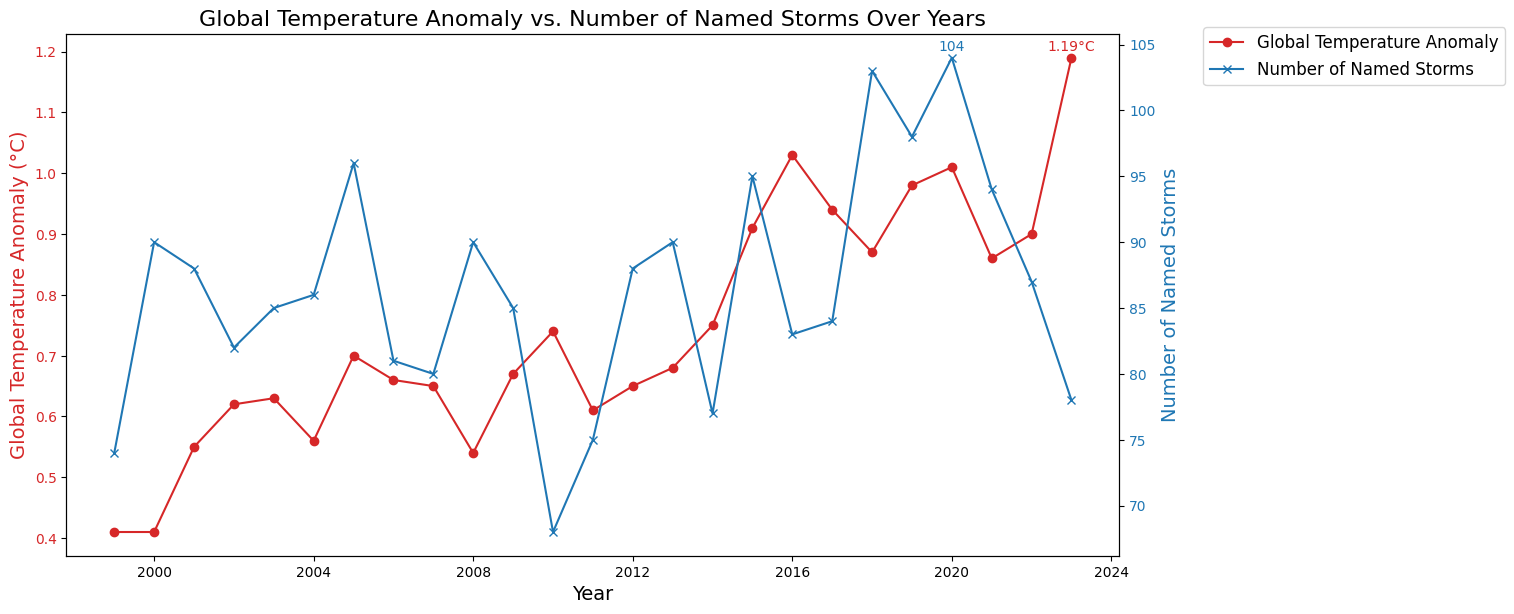

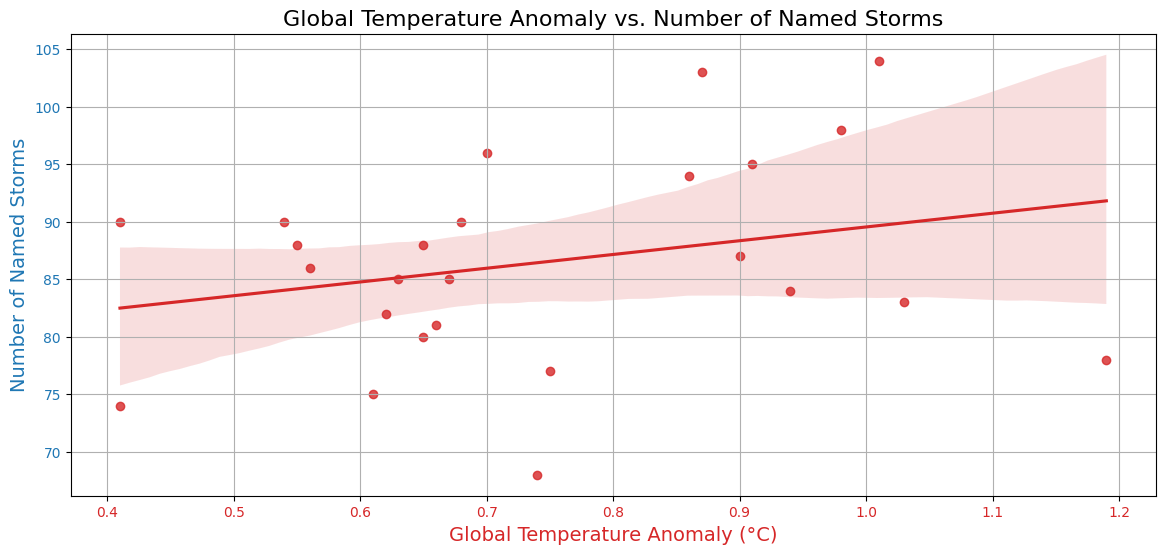

In [ ]:
# @title
# Create a figure, subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# The color for the first line
color = 'tab:red'
# Set the y and x-axis label with a custom font size
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Global Temperature Anomaly (°C)', color=color, fontsize=14)
# Plot the global temperature anomaly on the first y-axis, using a line plot with markers
ax1.plot(merged_df["Year"], merged_df["Anomaly"], color=color, label='Global Temperature Anomaly', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
# Define the color
color = 'tab:blue'
# Set the y-axis label for the second plot
ax2.set_ylabel('Number of Named Storms', color=color, fontsize=14)
# Plot the Number of Named Storms on the second y-axis, using a line plot with different markers
ax2.plot(merged_df["Year"], merged_df["Named Storms"], color=color, label='Number of Named Storms', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Annotations for significant data points
max_storms = merged_df['Named Storms'].max()
max_temp =merged_df['Anomaly'].max()
max_storms_year = merged_df.loc[merged_df['Named Storms'].idxmax(), 'Year']
max_temp_year = merged_df.loc[merged_df['Anomaly'].idxmax(), 'Year']

ax1.annotate(f'{max_temp:.2f}°C', xy=(max_temp_year, max_temp), xytext=(0, 5), textcoords='offset points', ha='center', color='tab:red')
ax2.annotate(f'{max_storms}', xy=(max_storms_year, max_storms), xytext=(0, 5), textcoords='offset points', ha='center', color='tab:blue')

# Adjust subplot params so that the subplots fits into the figure area
fig.tight_layout()
# Set the title of the plot
ax1.set_title('Global Temperature Anomaly vs. Number of Named Storms Over Years', fontsize=16)
# Place a legend outside the plot area
fig.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Display the plot
plt.show()

# Create a figure, subplot
plt.figure(figsize=(14, 6))
# Plot Anomaly vs.  Number of Named Storms with a regression line
sns.regplot(x='Anomaly', y='Named Storms', data=merged_df, color='tab:red')
plt.title('Global Temperature Anomaly vs. Number of Named Storms', fontsize=16)
plt.xlabel('Global Temperature Anomaly (°C)', fontsize=14, color='tab:red')
plt.ylabel('Number of Named Storms', fontsize=14, color='tab:blue')
plt.tick_params(axis='x', labelcolor='tab:red')
plt.tick_params(axis='y', labelcolor='tab:blue')
plt.grid(True)
plt.show()

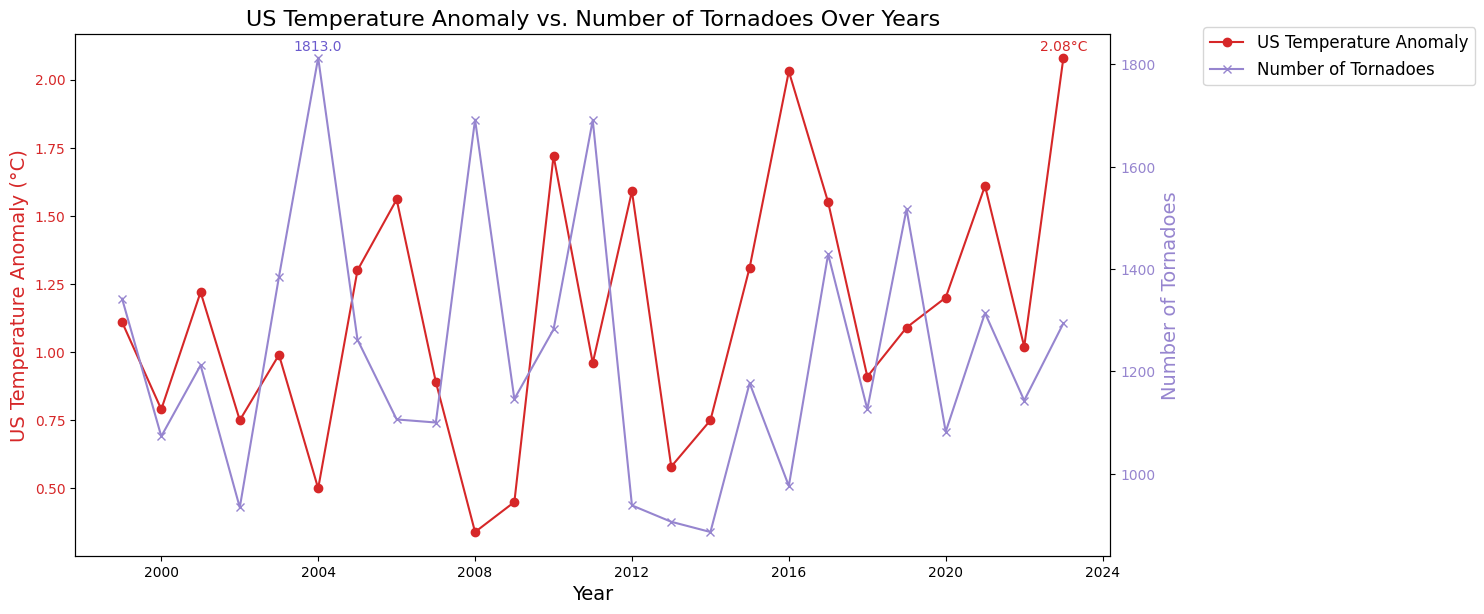

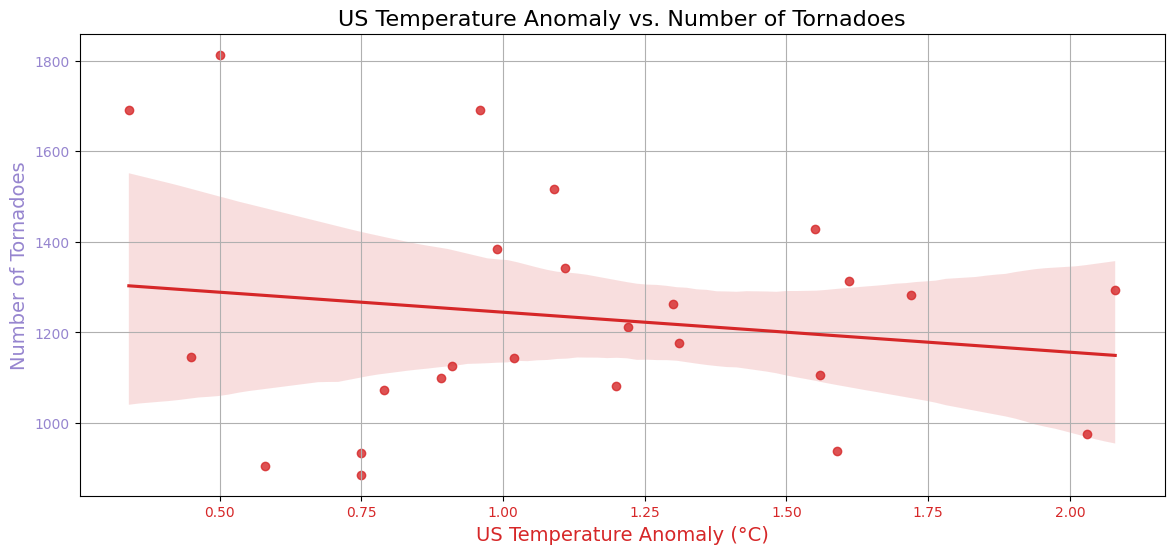

In [27]:
# @title
# Create a figure, subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# The color for the first line
color = 'tab:red'
# Set the y and x-axis label with a custom font size
ax1.set_xlabel('Year', fontsize=14)
# Plot the US temperature anomaly on the first y-axis, using a line plot with markers
ax1.set_ylabel('US Temperature Anomaly (°C)', color=color, fontsize=14)
ax1.plot(us_temp_tornadoes["Year"], us_temp_tornadoes["Anomaly"], color=color, label='US Temperature Anomaly', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
# Define the color
color = '#9685CF'
# Set the y-axis label for the second plot
ax2.set_ylabel('Number of Tornadoes', color=color, fontsize=14)
# Plot the Number of tornadoes on the second y-axis, using a line plot with different markers
ax2.plot(us_temp_tornadoes["Year"], us_temp_tornadoes["Tornadoes"], color=color, label='Number of Tornadoes', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Annotations for significant data points
max_tornadoes = us_temp_tornadoes['Tornadoes'].max()
max_temp = us_temp_tornadoes['Anomaly'].max()
max_tornadoes_year = us_temp_tornadoes.loc[us_temp_tornadoes['Tornadoes'].idxmax(), 'Year']
max_temp_year = us_temp_tornadoes.loc[us_temp_tornadoes['Anomaly'].idxmax(), 'Year']

ax1.annotate(f'{max_temp:.2f}°C', xy=(max_temp_year, max_temp), xytext=(0, 5), textcoords='offset points', ha='center', color='tab:red')
ax2.annotate(f'{max_tornadoes}', xy=(max_tornadoes_year, max_tornadoes), xytext=(0, 5), textcoords='offset points', ha='center', color='slateblue')

# Adjust subplot params so that the subplots fits into the figure area
fig.tight_layout()
# Set the title of the plot
ax1.set_title('US Temperature Anomaly vs. Number of Tornadoes Over Years', fontsize=16)
# Place a legend outside the plot area
fig.legend(loc='upper left',bbox_to_anchor=(1, 1), fontsize=12)

# Display the plot
plt.show()

# Create a figure, subplot
plt.figure(figsize=(14, 6))
# Plot the US temperature anomaly vs the number of tornadoes with a regression line
sns.regplot(x='Anomaly', y='Tornadoes', data=us_temp_tornadoes, color='tab:red')
plt.title('US Temperature Anomaly vs. Number of Tornadoes', fontsize=16)
plt.xlabel('US Temperature Anomaly (°C)', fontsize=14, color='tab:red')
plt.ylabel('Number of Tornadoes', fontsize=14, color='#9685CF')
plt.tick_params(axis='x', labelcolor='tab:red')
plt.tick_params(axis='y', labelcolor='#9685CF')
plt.grid(True)
plt.show()


This heatmap displays the correlation coefficients between temperature anomalies and various storm metrics. 
Each cell provides a correlation value between -1 and 1.

A value of 1 signifies a perfect positive correlation, meaning as one variable increases, the other does too.

A value of 0 indicates no correlation, and a value of -1 means a perfect negative correlation, one variable increases as the other decreases. 

It is important to note that correlation does not imply causation.



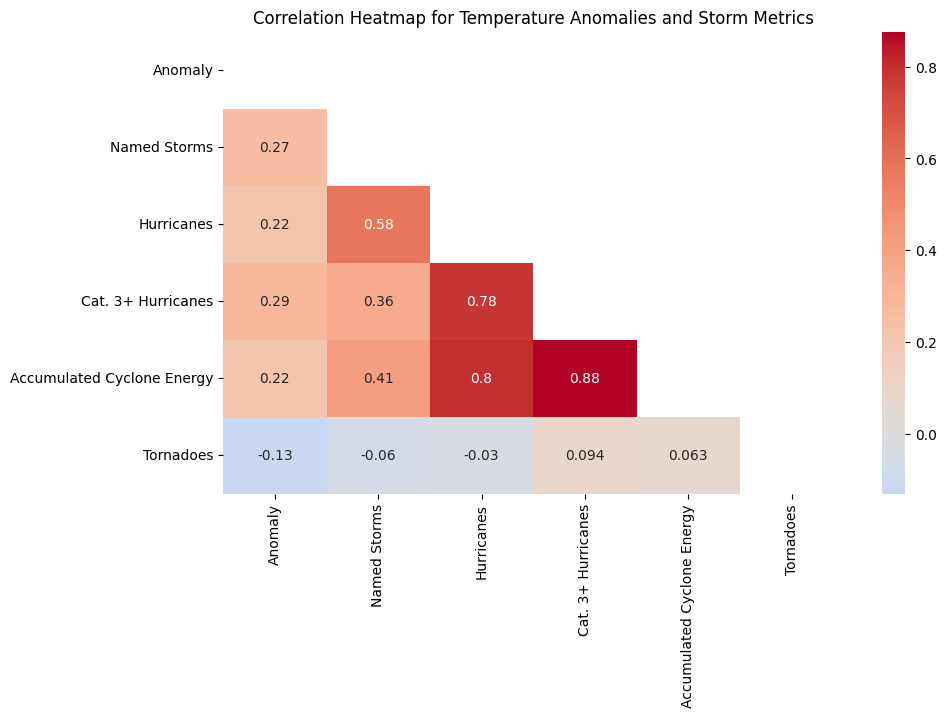

In [ ]:
# @title
# Heatmap description
correlation_description = """
This heatmap displays the correlation coefficients between temperature anomalies and various storm metrics. \nEach cell provides a correlation value between -1 and 1.
\nA value of 1 signifies a perfect positive correlation, meaning as one variable increases, the other does too.
\nA value of 0 indicates no correlation, and a value of -1 means a perfect negative correlation, one variable increases as the other decreases. \n
It is important to note that correlation does not imply causation.
"""

print(correlation_description)
# Prepare data for the heatmap
corr_columns = ['Anomaly', 'Named Storms', 'Hurricanes', 'Cat. 3+ Hurricanes', 'Accumulated Cyclone Energy', 'Tornadoes']
correlation_matrix = merged_df[corr_columns].corr()
# Create triangle correlation matrix
mask = np.triu(np.ones_like(merged_df[corr_columns].corr()))

# Plotthe heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,  mask=mask)
plt.title('Correlation Heatmap for Temperature Anomalies and Storm Metrics')
plt.show()

### 2.3 The Impact

Human activities such as deforestation and fossil fuel use have a significant impact on Earth's temperature. Deforestation causes fewer trees to absorb carbon dioxide, a greenhouse gas, from the atmosphere. Burning fossil fuels for energy, such as coal, oil, and natural gas, emits large amounts of carbon dioxide and other greenhouse gases. These gases trap heat from the sun, causing the greenhouse effect.

The increase in Earth's temperature caused by these activities has the potential to alter weather patterns and contribute to more intense and frequent weather events, such as storms. Warmer ocean temperatures provide more energy to cyclones, potentially increasing their power and destructiveness. Data analysis of weather patterns over time can reveal correlations between human-induced temperature changes and storm behavior, implying that our actions do influence storm intensity and frequency.

Economically, the damage from stronger storms can be staggering, running into billions of dollars. The costs are multifaceted, encompassing not only the immediate expenses of emergency response and recovery efforts but also the long-term impacts on local and national economies. Businesses are disrupted, supply chains are broken, and agricultural production is often severely affected, leading to food shortages and increased prices. Additionally, the rebuilding process can strain government resources, potentially diverting funds from other crucial areas of development.

The human cost of these natural disasters is enormous, with lives lost, millions displaced, and communities destroyed. Cyclones bring strong winds, heavy rainfall, and storm surges, which can cause widespread flooding and devastate homes, infrastructure, etc. This destruction causes not only immediate loss of life, but also long-term societal and mental health problems as communities work to rebuild.

The increasing strength and frequency of cyclones, attributed in part to climate change, suggest that these human and economic costs could escalate. This underscores the urgency of global efforts to mitigate climate change, enhance disaster preparedness, and build more resilient communities to reduce future impacts.

## Conclusion


Rising temperatures appear to play a significant role in the frequency and intensity of storms, both globally and locally (the United States). While investigation revealed a clear pattern: as the Earth's temperature increases, so does the number of named storms,the plot takes an unexpected turn when we hone in on the United States.

In the national spotlight, we expected to see a similar trend of tornadoes number rising with temperature. However, the data revealed a different story: the number of tornadoes did not follow the temperature trend. This discord in the data chorus serves as a reminder that our planet's climate system is a complex symphony influenced by a wide range of factors other than temperature. Geographic diversity, atmospheric conditions, and even the unpredictable nature of weather events all contribute to this complex melody. The lack of a clear link between temperature anomalies in the United States and tornadoes provides young scientists with a wealth of research opportunities. It encourages students to delve into the 'whys' and 'how comes' question, explore, and seek understanding beyond the obvious. Why do tornadoes seem to defy expectations? What other factors could be influencing the weather patterns?

At the end, we are left with a clear message: the Earth's climate system is a puzzle with many pieces yet to be assembled.

# References


1. Knaflic, C. N. (2015). Storytelling with Data. https://doi.org/10.1002/9781119055259

2. NCEI.Monitoring.Info@noaa.gov. (n.d.). Climate at a Glance | Global Time Series | National Centers for Environmental Information (NCEI). https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/12/9/1999-2023?trend=true&trend_base=10&begtrendyear=1998&endtrendyear=2023

3. NCEI.Monitoring.Info@noaa.gov. (n.d.-b). Climate at a Glance | Global Time Series | National Centers for Environmental Information (NCEI). https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/northAmerica/land/12/9/1999-2023?trend=true&trend_base=10&begtrendyear=1998&endtrendyear=2023

4. NCEI.Monitoring.Info@noaa.gov. (n.d.-c). U.S. Tornadoes | National Centers for Environmental Information (NCEI). https://www.ncei.noaa.gov/access/monitoring/tornadoes/ytd/0?fatalities=false

5. Colorado State University. Global Statistics compared with climatology. (n.d.). https://tropical.atmos.colostate.edu/Realtime/index.php?arch&loc=global

6. Tornadoes and global warming: is there a connection? (n.d.). https://education.nationalgeographic.org/resource/tornadoes-and-global-warming-there-connection/

7. Dictionary.com. (2021). Cyclone vs. Typhoon vs. Hurricane vs. Tornado: Are They All The Same? In Dictionary.com. https://www.dictionary.com/e/typhoons-hurricanes-cyclones/